In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv


In [58]:

df = pd.read_csv('/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv')#Veri Setini okuttuk

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

* Burada eksik veriler gözlemledim örnek: address kısmında 223180 veri var ve yaklaşık 16000 veri eksik.
* tarih kısmı object olarak görünüyor bunu datetime olarak dönüşütrmekte fayda var.
1. eksik verileri temizleyerek devam etmeyi uygun görüyorum.

In [90]:
# %50'den fazla verisi eksik olan sütunları temizleme
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)


In [91]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,7.430440e+05,0.741265,0.512748,8.562795,36.387402,-91.114658,1.197356,56.338055,19.220963
std,2.091119e+05,0.836946,0.811413,8.860640,5.380361,14.878459,1.459521,45.972777,12.876918
min,1.061010e+05,0.000000,0.000000,0.000000,19.694400,-159.391000,1.000000,1.000000,1.000000
25%,6.131120e+05,0.000000,0.000000,3.000000,32.519800,-96.634800,1.000000,24.000000,8.500000
50%,7.729770e+05,1.000000,0.000000,5.000000,36.208100,-86.750800,1.000000,49.000000,17.000000
75%,8.977085e+05,1.000000,1.000000,11.000000,40.757000,-81.381250,1.000000,84.000000,28.000000
max,1.082552e+06,6.000000,12.000000,53.000000,61.228900,-68.714500,35.000000,605.000000,63.000000


* eksik veriler göze çarpıyor bunları temizleyeceğim


In [92]:
# Belirli sütunlarda eksik verileri temizleme
df_cleaned = df_cleaned.dropna(subset=['congressional_district', 'latitude', 'longitude', 'n_guns_involved'])

In [93]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,False,...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,False,...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0
181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,False,...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19.0,5.0
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0


In [94]:
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,False,...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,False,...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0
181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,False,...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19.0,5.0
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0
6075,106101,2014-02-12,Tennessee,Jackson,1050 Union University Dr,1,0,http://www.gunviolencearchive.org/incident/106101,http://www.jacksonsun.com/story/news/crime/201...,False,...,0::21||1::22,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Olivia Greenlee||1::Charles Pittman,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.jacksonsun.com/story/news/crime/201...,73.0,27.0
8564,113439,2014-03-09,Tennessee,Memphis,2174 Westchester Dr,1,0,http://www.gunviolencearchive.org/incident/113439,http://www.wmcactionnews5.com/story/32506761/m...,False,...,0:37|1:17|2:17|3:21,0:Adult 18+|1:Teen 12-17|2:Teen 12-17|3:Adult 18+,0:Male|1:Male|2:Male|3:Male,0:Larry Wilkins|1:Martiness Henderson|2:Walter...,1:Armed Robbery|2:Armed Robbery|3:Armed Robbery,"0:Killed|1:Unharmed, Arrested|2:Unharmed, Arre...",0:Victim|1:Subject-Suspect|2:Subject-Suspect|3...,http://www.wmctv.com/story/24928457/man-shot-

* Bazı satırlarda eksik NaN değerler bulunuyor.
* bazı değerler birleştirilmiş görünüyor mesela participant_age, participant_age_group, participant_gender gibi sütunlarda değerlerin "0::" formatında tutulduğunu görüyorum.
* link içeren sütunlar işimize yaramayacağı için bunları kaldıracağım.
* Adres sütununda da bazı karmaşıklıklar var bazı satırlarda tam adres fakat bazı adreslerde de sadece sokak isimleri bu sütunu da kaldıracağım.

1. Birleşmiş değerleri split() metodu ile ayıracağım ve NaN değerleri temizleyeceğim.
2. İşimize yaramayacak olan sütunları kaldıracağım.

In [65]:
# Tüm NaN değerlerini içeren satırları temizle
df_cleaned = df.dropna(inplace=True)
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,False,...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,False,...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0
181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,False,...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19.0,5.0
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0
6075,106101,2014-02-12,Tennessee,Jackson,1050 Union University Dr,1,0,http://www.gunviolencearchive.org/incident/106101,http://www.jacksonsun.com/story/news/crime/201...,False,...,0::21||1::22,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Olivia Greenlee||1::Charles Pittman,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.jacksonsun.com/story/news/crime/201...,73.0,27.0
8564,113439,2014-03-09,Tennessee,Memphis,2174 Westchester Dr,1,0,http://www.gunviolencearchive.org/incident/113439,http://www.wmcactionnews5.com/story/32506761/m...,False,...,0:37|1:17|2:17|3:21,0:Adult 18+|1:Teen 12-17|2:Teen 12-17|3:Adult 18+,0:Male|1:Male|2:Male|3:Male,0:Larry Wilkins|1:Martiness Henderson|2:Walter...,1:Armed Robbery|2:Armed Robbery|3:Armed Robbery,"0:Killed|1:Unharmed, Arrested|2:Unharmed, Arre...",0:Victim|1:Subject-Suspect|2:Subject-Suspect|3...,http://www.wmctv.com/story/24928457/man-shot-

In [95]:
# Tüm NaN değerlerini içeren satırları temizleme
df_cleaned = df_cleaned.dropna()

In [96]:
# Gereksiz sütunları kaldırma (inplace=False)
df_cleaned = df_cleaned.drop(['address', 'incident_url', 'source_url', 'sources'], axis=1, errors='ignore')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

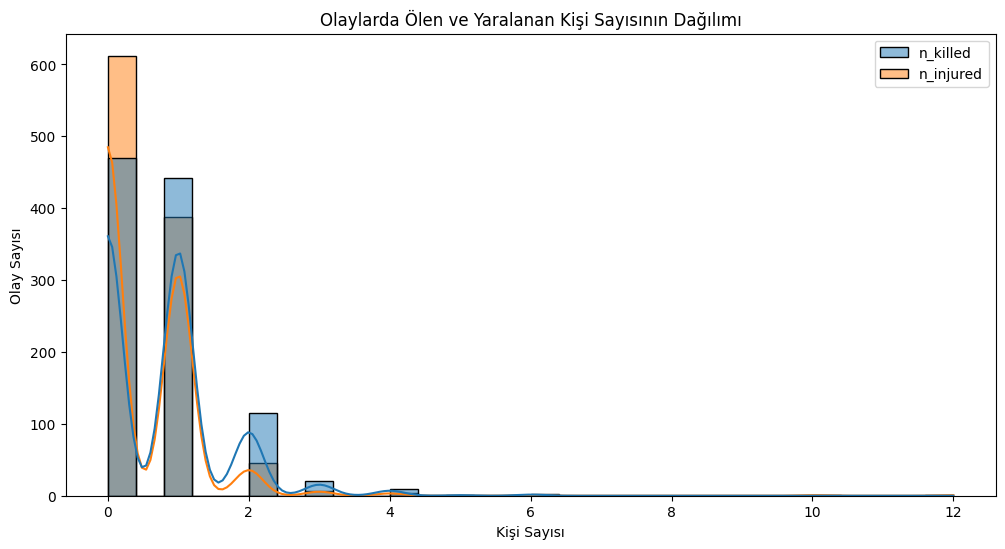

In [98]:
# Ölen ve yaralanan kişi sayılarının dağılımını görselleştirme
plt.figure(figsize=(12, 6))
sns.histplot(df_summary, bins=30, kde=True)
plt.xlabel('Kişi Sayısı')
plt.ylabel('Olay Sayısı')
plt.title('Olaylarda Ölen ve Yaralanan Kişi Sayısının Dağılımı')
plt.show()

1. Burada verilerimi görselleştirdik, ölü ve yaralı sayısını grafik üzerinde gördük

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Özellikler ve hedef değişkenleri belirleme
X = df_cleaned.drop('n_killed', axis=1)  # Özellikler
y = df_cleaned['n_killed']  # Hedef değişken

In [100]:
# Kategorik değişkenleri sayısal hale getirme
X = pd.get_dummies(X, drop_first=True)

In [101]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Veriyi standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Lojistik regresyon modelini oluşturma
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [104]:
# Modeli test etme
y_pred = model.predict(X_test_scaled)

In [107]:
# Sonuçları değerlendirme
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

In [110]:
# Confusion matrix'i bir DataFrame olarak oluşturma
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=[f'Class {i}' for i in range(conf_matrix.shape[0])],
                              columns=[f'Class {i}' for i in range(conf_matrix.shape[1])])


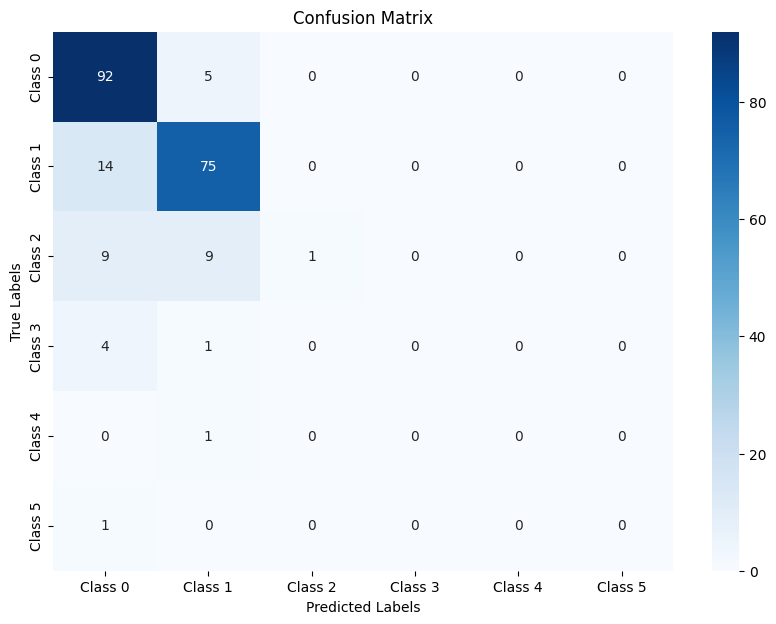

In [113]:
# Confusion matrix'i görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [111]:
# Classification report'u bir DataFrame olarak oluşturma
class_report_df = pd.DataFrame(class_report).transpose()

In [112]:
# DataFrame'leri göstermek
conf_matrix_df, class_report_df

(         Class 0  Class 1  Class 2  Class 3  Class 4  Class 5
 Class 0       92        5        0        0        0        0
 Class 1       14       75        0        0        0        0
 Class 2        9        9        1        0        0        0
 Class 3        4        1        0        0        0        0
 Class 4        0        1        0        0        0        0
 Class 5        1        0        0        0        0        0,
               precision    recall  f1-score     support
 0              0.766667  0.948454  0.847926   97.000000
 1              0.824176  0.842697  0.833333   89.000000
 2              1.000000  0.052632  0.100000   19.000000
 3              0.000000  0.000000  0.000000    5.000000
 4              0.000000  0.000000  0.000000    1.000000
 5              0.000000  0.000000  0.000000    1.000000
 accuracy       0.792453  0.792453  0.792453    0.792453
 macro avg      0.431807  0.307297  0.296877  212.000000
 weighted avg   0.786407  0.792453  0.746771 

* Bu model Class 0 ve Class 1 için oldukça iyi performans gösteriyor. Bu sınıfların hem precision hem de recall değerleri oldukça yüksek.
* Class 2 için recall değeri çok düşük, bu da modelin bu sınıfa ait örnekleri genellikle kaçırdığı anlamına gelir.
* Class 3, Class 4, ve Class 5 için sonuçlar oldukça düşük. Bu durum, modelin bu sınıfları tanımlamada zorluk yaşadığını gösterir.
* Modelin performansını arttırmak için daha fazla veri eklenebilir veya lojistik regresyon dışında farklı algoritmalarla da test edilebilir